The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious passenger ship of its time. Sadly, the British ocean liner sank on April 15, 1912, killing over 1500 people while just 705 survived. See https://www.encyclopedia-titanica.org/

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv("datasets/original_titanic.csv")

In [2]:
data.replace("?", np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

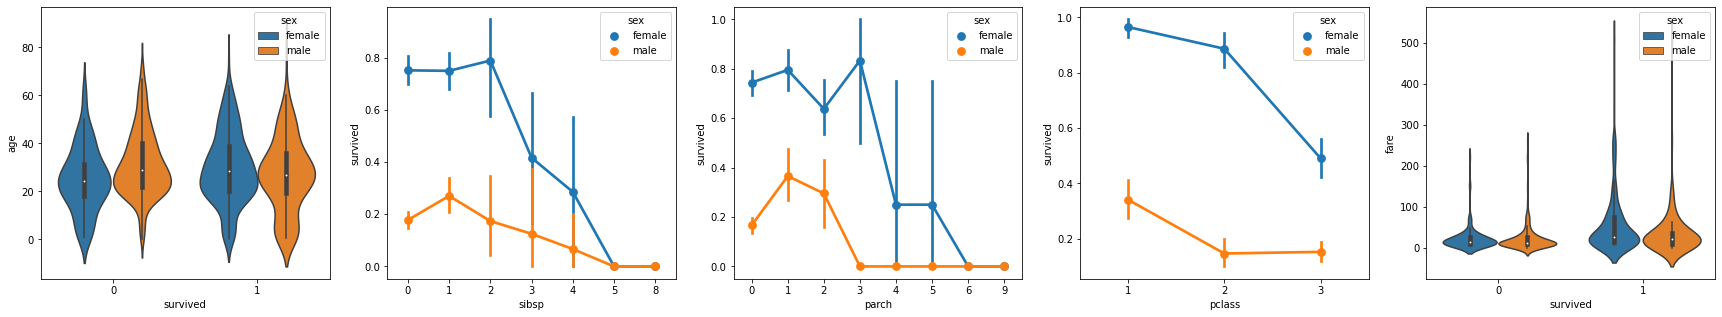

In [3]:
fig, axs = plt.subplots(ncols=5, figsize=(30, 5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [4]:
data.replace({"male": 1, "female": 0}, inplace=True)

In [5]:
data.corr().abs()[["survived"]]

survived
pclass    0.312469
survived  1.000000
sex       0.528693
age       0.055512
sibsp     0.027825
parch     0.082660
fare      0.244265
body           NaN

In [6]:
data["relatives"] = data.apply(
    lambda row: int((row["sibsp"] + row["parch"]) > 0), axis=1
)
data.corr().abs()[["survived"]]

survived
pclass     0.312469
survived   1.000000
sex        0.528693
age        0.055512
sibsp      0.027825
parch      0.082660
fare       0.244265
body            NaN
relatives  0.201719

In [7]:
data = data[["sex", "pclass", "age", "relatives", "fare", "survived"]].dropna()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    data[["sex", "pclass", "age", "relatives", "fare"]],
    data.survived,
    test_size=0.2,
    random_state=0,
)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [10]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [11]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [12]:
model = Sequential()

2022-04-12 19:17:02.140373: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.add(
    Dense(5, kernel_initializer="uniform", activation="relu", input_dim=5)
)
model.add(Dense(5, kernel_initializer="uniform", activation="relu"))
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 476us/step - loss: 0.6923 - accuracy: 0.5801
Epoch 2/50
27/27 [==============================] - 0s 483us/step - loss: 0.6903 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 483us/step - loss: 0.6874 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 494us/step - loss: 0.6809 - accuracy: 0.6316
Epoch 5/50
27/27 [==============================] - 0s 626us/step - loss: 0.6682 - accuracy: 0.7548
Epoch 6/50
27/27 [==============================] - 0s 516us/step - loss: 0.6486 - accuracy: 0.7632
Epoch 7/50
27/27 [==============================] - 0s 486us/step - loss: 0.6227 - accuracy: 0.7787
Epoch 8/50
27/27 [==============================] - 0s 562us/step - loss: 0.5952 - accuracy: 0.7763
Epoch 9/50
27/27 [==============================] - 0s 509us/step - loss: 0.5675 - accuracy: 0.7739
Epoch 10/50
27/27 [==============================] - 0s 526us/step - loss: 0.5435 - accuracy: 0.7727

In [16]:
predict_x = model.predict(X_test)
y_pred = np.argmax(predict_x, axis=-1)
print(metrics.accuracy_score(y_test, y_pred))

0.6124401913875598
